In [1]:
# 1️⃣ Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score
import joblib

In [2]:
# 2️⃣ Load dataset
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
print("Jumlah baris dan kolom:", df.shape)
df.head()


Jumlah baris dan kolom: (5110, 12)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
# 3️⃣ Cek informasi data
df.info()
print("\nJumlah missing value tiap kolom:")
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB

Jumlah missing value tiap kolom:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          

In [4]:
# 4️⃣ Bersihkan data dan preprocessing
# Hapus baris dengan missing value pada kolom BMI
df['bmi'] = df['bmi'].fillna(df['bmi'].median())

# Hapus kolom id karena tidak berguna untuk prediksi
df = df.drop(columns=['id'])

# Ubah kolom kategorikal menjadi numerik
categorical_cols = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("Bentuk data setelah encoding:", df_encoded.shape)
df_encoded.head()


Bentuk data setelah encoding: (5110, 17)


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,True,False,True,False,True,False,False,True,True,False,False
1,61.0,0,0,202.21,28.1,1,False,False,True,False,False,True,False,False,False,True,False
2,80.0,0,1,105.92,32.5,1,True,False,True,False,True,False,False,False,False,True,False
3,49.0,0,0,171.23,34.4,1,False,False,True,False,True,False,False,True,False,False,True
4,79.0,1,0,174.12,24.0,1,False,False,True,False,False,True,False,False,False,True,False


In [5]:
# 5️⃣ Pisahkan fitur (X) dan target (y)
X = df_encoded.drop(columns=['stroke'])
y = df_encoded['stroke']

# Split data train & test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Jumlah data latih :", X_train.shape)
print("Jumlah data uji   :", X_test.shape)


Jumlah data latih : (3577, 16)
Jumlah data uji   : (1533, 16)


In [6]:
# 6️⃣ Train model Random Forest
rf = RandomForestClassifier(n_estimators=200, max_depth=8, random_state=42)
rf.fit(X_train, y_train)

# Akurasi training & testing
train_acc = rf.score(X_train, y_train)
test_acc = rf.score(X_test, y_test)

print("=== Hasil Training Random Forest ===")
print(f"Akurasi Data Latih : {train_acc:.4f}")
print(f"Akurasi Data Uji   : {test_acc:.4f}")


=== Hasil Training Random Forest ===
Akurasi Data Latih : 0.9567
Akurasi Data Uji   : 0.9511


In [7]:
# 7️⃣ Evaluasi Model
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]

print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

print("\n=== Confusion Matrix ===")
cm = confusion_matrix(y_test, y_pred)
print(cm)



=== Classification Report ===
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1458
           1       0.00      0.00      0.00        75

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.90      0.95      0.93      1533


=== Confusion Matrix ===
[[1458    0]
 [  75    0]]


c:\Users\ZENBOOK\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ZENBOOK\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ZENBOOK\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

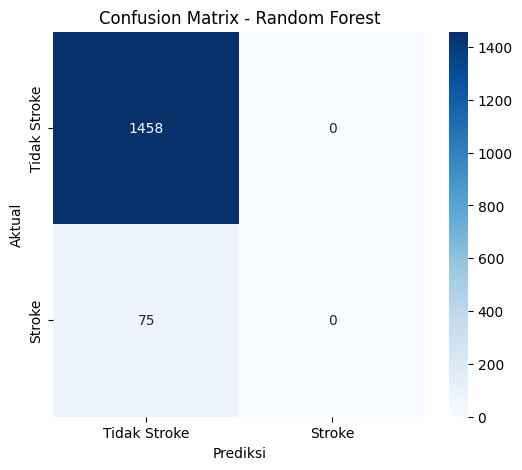

In [8]:
# 8️⃣ Visualisasi Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Stroke', 'Stroke'],
            yticklabels=['Tidak Stroke', 'Stroke'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix - Random Forest')
plt.show()


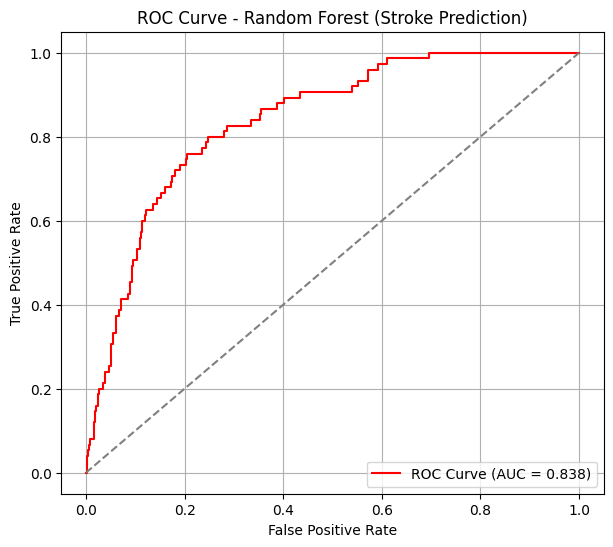

AUC Score: 0.8383


In [9]:
# 9️⃣ ROC Curve & AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(7,6))
plt.plot(fpr, tpr, color='red', label=f"ROC Curve (AUC = {auc:.3f})")
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest (Stroke Prediction)")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print(f"AUC Score: {auc:.4f}")


In [10]:
# 🔟 Simpan model dan daftar fitur
joblib.dump(rf, "model_random_forest_stroke.joblib")
joblib.dump(X.columns.tolist(), "features_stroke.joblib")
print("✅ Model & fitur berhasil disimpan!")


✅ Model & fitur berhasil disimpan!
